In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as skl
import pickle
import spliland
import importlib
import random
import fclParse
from scipy import stats
from sklearn.metrics import classification_report, confusion_matrix
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras_lr_finder import LRFinder
from datetime import datetime, time

In [2]:
directory = './template_data_v2/set_1/'
n_epochs = 50

In [3]:
tf.config.run_functions_eagerly(True)

## Intro

The purpose of this notebook is to make a second attempt at a neural network, following along with what was described in the paper "Deep Learning Based Pulse Shape Analysis for GERDA" by Philipp Holl in 2017. This algorithm consists of an autoencoder, decoder, and then classifier.

I am also following this guide: https://keras.io/examples/timeseries/timeseries_anomaly_detection/ for the implementation of the layers described in the paper into python

### Prep the data

In [4]:
n_files = 3
n_points = 15000
file_points = n_points // n_files

start = datetime.now()
x_train = []
y_train = []
x_test = []
y_test = []

for file_num in range(1, n_files+1):
    #print(y_train)
    with open(directory + 'train_{0}.data'.format(file_num), 'rb') as file:
        dataframes = pickle.load(file)

        for df in dataframes[:file_points]:
            #print(df)
            x_train.append(list(df['trace']))
            y_train.append(int(df['nParticles']))
        file.close()

with open(directory + 'test.data', 'rb') as file:
    dataframes = pickle.load(file)
    
    for df in dataframes:
        x_test.append(list(df['trace']))
        y_test.append(int(df['nParticles']))
    file.close()

X_train = np.array(x_train)
x_test = np.array(x_test)
Y_train = np.array(y_train)
y_test = np.array(y_test)

end = datetime.now()
diff = end - start
print("\ntime:")
print(diff.total_seconds())


time:
99.553773


In [5]:
X_train.shape

(15000, 1, 21816)

In [6]:
X_train = np.reshape(x_train, (n_points, 21816, 1))
Y_train = np.reshape(y_train, (n_points, 1))

In [7]:
X_test = np.reshape(x_test, (1001, 21816, 1))
Y_test = np.reshape(y_test, (1001, 1))

In [8]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(15000, 21816, 1)
(15000, 1)
(1001, 21816, 1)
(1001, 1)


In [9]:
X_test[2]

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

### Classifier

In [10]:
classifier_model_1 = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(21816,)),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(20, activation='relu')
])

In [18]:
classifier_model_2 = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(21816,)),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(20, activation='relu')
])

In [26]:
classifier_model_3 = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(21816,)),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(20, activation='relu')
])

In [34]:
classifier_model_4 = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(21816,)),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
])

In [11]:
optimizer = keras.optimizers.Adam()#lr=0.0001)
classifier_model_1.compile(optimizer = optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [19]:
optimizer = keras.optimizers.Adam()#lr=0.0001)
classifier_model_2.compile(optimizer = optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [27]:
optimizer = keras.optimizers.Adam()#lr=0.0001)
classifier_model_3.compile(optimizer = optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [35]:
optimizer = keras.optimizers.Adam()#lr=0.0001)
classifier_model_4.compile(optimizer = optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [36]:
classifier_history_4 = classifier_model_4.fit(X_train,
                                              Y_train,
                                              epochs=n_epochs)

Epoch 1/50
469/469 [==============================] - 28s 59ms/step - loss: 1.0580 - accuracy: 0.5506
Epoch 2/50
469/469 [==============================] - 28s 61ms/step - loss: 0.4135 - accuracy: 0.8211
Epoch 3/50
469/469 [==============================] - 28s 59ms/step - loss: 0.2873 - accuracy: 0.8845
Epoch 4/50
469/469 [==============================] - 28s 59ms/step - loss: 0.1999 - accuracy: 0.9209
Epoch 5/50
469/469 [==============================] - 28s 60ms/step - loss: 0.1703 - accuracy: 0.9329
Epoch 6/50
469/469 [==============================] - 32s 67ms/step - loss: 0.1704 - accuracy: 0.9411
Epoch 7/50
469/469 [==============================] - 31s 66ms/step - loss: 0.0842 - accuracy: 0.9713
Epoch 8/50
469/469 [==============================] - 29s 62ms/step - loss: 0.1044 - accuracy: 0.9608
Epoch 9/50
469/469 [==============================] - 27s 59ms/step - loss: 0.0652 - accuracy: 0.9769
Epoch 10/50
469/469 [==============================] - 30s 64ms/step - loss: 0.091

In [37]:
h_df = pd.DataFrame(classifier_history_4.history)
h_df.to_csv(directory + 'set1_model4.csv'.format(n_epochs))

In [38]:
classifier_model_4.save(directory + 'set1_model4')

INFO:tensorflow:Assets written to: ./template_data_v2/set_1/set1_model4/assets


### Performance Stats

No handles with labels found to put in legend.


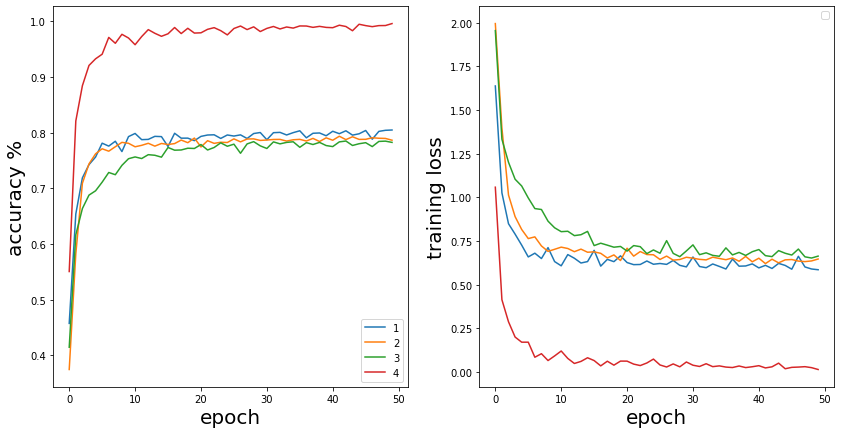

In [39]:
fig, ax = plt.subplots(1,2);
fig.set_size_inches(14,7);

ax[0].plot(classifier_history_1.history['accuracy'], label='1')
ax[0].plot(classifier_history_2.history['accuracy'], label='2')
ax[0].plot(classifier_history_3.history['accuracy'], label='3')
ax[0].plot(classifier_history_4.history['accuracy'], label='4')

ax[0].set_xlabel("epoch", fontsize=20)
ax[0].set_ylabel("accuracy %", fontsize=20)
ax[0].legend()

ax[1].plot(classifier_history_1.history['loss'])
ax[1].plot(classifier_history_2.history['loss'])
ax[1].plot(classifier_history_3.history['loss'])
ax[1].plot(classifier_history_4.history['loss'])

ax[1].set_xlabel("epoch", fontsize=20)
ax[1].set_ylabel("training loss", fontsize=20)
ax[1].legend()

In [40]:
Y_pred = classifier_model_4.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

matrix = confusion_matrix(Y_test, y_pred, normalize='true', labels=[0,1,2,3,4,5,6])

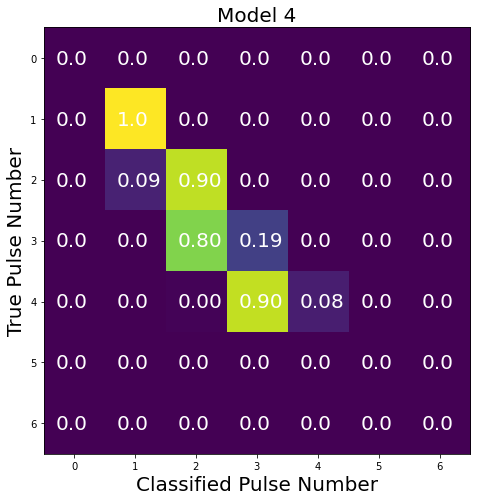

In [41]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(7,7)

labels = ['0', '1', '2', '3', '4', '5', '6']

grid = np.array(matrix)
im = ax.imshow(grid)

for k in range (0, len(grid)):
        for l in range (0, len(grid[0])):
            ax.text(l-0.3, k+0.1, str(grid[k][l])[:4], size=20, color='white')
            
ax.set_xticklabels([''] + labels);
ax.set_yticklabels([''] + labels);

ax.set_ylabel('True Pulse Number', fontsize=20);
ax.set_xlabel('Classified Pulse Number', fontsize=20);
ax.set_title('{0} epochs'.format(n_epochs))

fig.tight_layout()

ax.set_title("Model 4", fontsize=20)
plt.savefig(directory + "set1_model4.png".format(n_epochs))

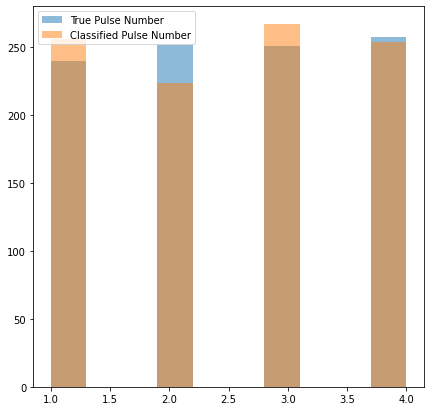

In [19]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(7, 7)

ax.hist(y_test, alpha=0.5, label='True Pulse Number')
ax.hist(y_pred, alpha=0.5, label='Classified Pulse Number')
ax.legend()

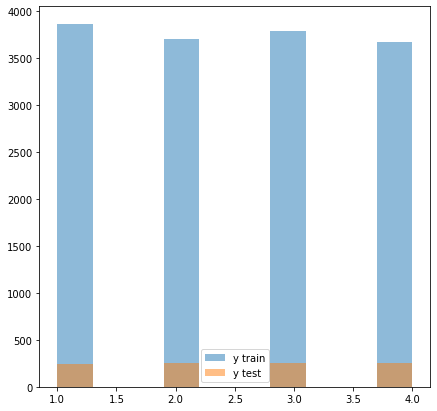

In [20]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(7, 7)

ax.hist(y_train, alpha=0.5, label='y train')
ax.hist(y_test, alpha=0.5, label='y test')
ax.legend()

array([4, 4, 2, 5, 1, 1, 4, 5, 2, 3, 2, 1, 4, 4, 1, 1, 3, 3, 1, 4, 2, 5,
       1, 1, 3, 5, 2, 3, 3, 5, 3, 1, 2, 4, 1, 3, 4, 1, 5, 4, 4, 3, 2, 4,
       2, 4, 5, 3, 1, 3, 4, 4, 4, 2, 1, 4, 3, 4, 1, 3, 5, 1, 3, 5, 2, 3,
       3, 1, 1, 5, 3, 4, 4, 2, 1, 3, 2, 1, 5, 5, 1, 5, 3, 1, 1, 3, 1, 5,
       5, 3, 1, 2, 1, 1, 4, 3, 3, 1, 2, 5])